In [2]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("world_happiness_report_2020.csv")
df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [3]:
print(df.shape)
df.info()
#There are 153 observations

(153, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  153 non-null    object 
 1   Regional indicator            153 non-null    object 
 2   Ladder score                  153 non-null    float64
 3   Logged GDP per capita         153 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Generosity                    153 non-null    float64
 8   Perceptions of corruption     153 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


In [4]:
#summary
#What's the median life expectancy of all countries? 
df["Healthy life expectancy"].median()
#It's 66.3 years. Not bad

df.loc[df["Country name"]== "Nepal"]
#just 63.77 years
#Now what are the most and least free countries? 
df1 = df.sort_values("Freedom to make life choices")
df1
#Afghanistan, South Sudan, Algeria, Haiti, and Greece seem to the least free countries in terms of
#abilities to make life choices.
df2 = df.sort_values("Freedom to make life choices", ascending = False)
df2
#Uzbekistan, Cambodia, Norway, Denmark, and Finland seem to be the freest countries

#What's the mean GDP of all the countries? 
import numpy as np
x = df["Logged GDP per capita"].mean()
np.exp(x)
#average GDP per capita of the world is $10,891

10891.150296012715

In [12]:
df.loc[df['Country name'] == 'Nepal']
#seeing how Nepal, my home country, ranks. 

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,rich_poor
91,Nepal,South Asia,5.1372,7.925357,0.785512,63.779179,0.797565,0.154169,0.738099,poor


In [5]:
#are social support and life expectancy correlated? 
import scipy.stats as ss
r, p = ss.pearsonr(df['Social support'], df['Healthy life expectancy'])
if p<=0.05:
    print("Correlation between social support and life expectancy is statistically significant")
    print("correlation = ", r)
    print("p-value = ", p)
else:
    print("No statistically significant correlation exists between social support and life expectancy")
    

Correlation between social support and life expectancy is statistically significant
correlation =  0.7427440895198052
p-value =  4.308627486337134e-28


In [6]:
"""
I want to divide countries into two groups - rich and poor - based on their GDP per capita,
dividing them by the median GDP. 
Then I want to compare them on social ladder variable. 
Do people in rich country feel higher up in the social ladder than those in poor countries? 
"""
df["rich_poor"] = [np.nan for i in range(len(df.index))]
df["rich_poor"][df["Logged GDP per capita"]>=x] = "rich"
df["rich_poor"][df["Logged GDP per capita"]<x] = "poor"

print(df.info())
df.head()
rich_ladder = df.where(df["rich_poor"]=="rich").dropna()["Ladder score"]
poor_ladder = df.where(df["rich_poor"] == "poor").dropna()["Ladder score"]
t, p = ss.ttest_ind(rich_ladder, poor_ladder)
if p <=0.05:
    print("Being in a rich or poor country DOES predict how people percieve their position in the social ladder")
else:
    print("Being in a rich or poor country DOES NOT predict how people percieve their position in the social ladder")
    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  153 non-null    object 
 1   Regional indicator            153 non-null    object 
 2   Ladder score                  153 non-null    float64
 3   Logged GDP per capita         153 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Generosity                    153 non-null    float64
 8   Perceptions of corruption     153 non-null    float64
 9   rich_poor                     153 non-null    object 
dtypes: float64(7), object(3)
memory usage: 12.1+ KB
None
Being in a rich or poor country DOES predict how people percieve their position in the social ladder


<ipython-input-6-c21930e27922>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rich_poor"][df["Logged GDP per capita"]>=x] = "rich"


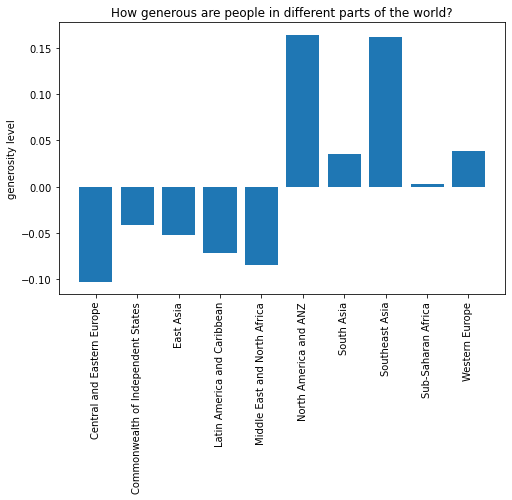

In [66]:
#plotting how generous are people in different parts of the world
df2 = df.groupby("Regional indicator")["Generosity"].mean().reset_index(name = "generosity_level")
df2
plt.figure(figsize = (8,5))
plt.bar(df2["Regional indicator"], df2["generosity_level"])
plt.xticks(rotation = 90)
plt.ylabel("generosity level")
plt.title("How generous are people in different parts of the world?")
plt.show()

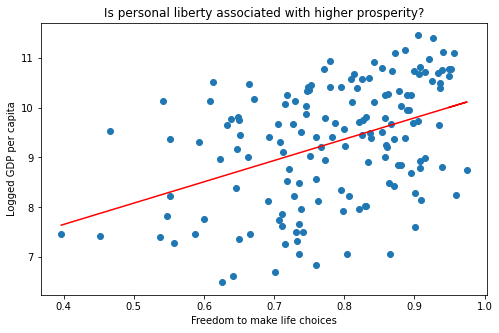

In [8]:
#plotting how personal liberty relates to prosperity
plt.figure(figsize = (8,5))
x = df["Freedom to make life choices"]
y = df["Logged GDP per capita"]
plt.scatter(x,y)
plt.xlabel("Freedom to make life choices")
plt.ylabel("Logged GDP per capita")
plt.title("Is personal liberty associated with higher prosperity?")
#for the best fit line:
theta = np.polyfit(x,y,1)
y_line = theta[1] + theta[0]*x
plt.plot(x, y_line, 'r')
plt.show()

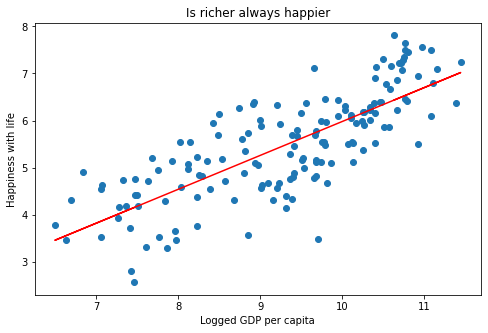

Correlation between GDP per capita and happiness is statistically significant
correlation =  0.7753744007526844
p-value =  5.983050790572217e-32


In [14]:
plt.figure(figsize = (8,5))
x = df["Logged GDP per capita"]
y = df["Ladder score"]
plt.scatter(x,y)
plt.ylabel("Happiness with life")
plt.xlabel("Logged GDP per capita")
plt.title("Is richer always happier")
#for the best fit line:
theta = np.polyfit(x,y,1)
y_line = theta[1] + theta[0]*x
plt.plot(x, y_line, 'r')
plt.show()
#######


r, p = ss.pearsonr(x, y)
if p<=0.05:
    print("Correlation between GDP per capita and happiness is statistically significant")
    print("correlation = ", r)
    print("p-value = ", p)
else:
    print("No statistically significant correlation exists between GDP per capita and happiness")


In [ ]:
"""
The dataset I chose for the project records various indicators of happiness in the countries all over the world. Based on various calculations, analyses, and visualizations, I have learned several interesting facts, such as the following:
 The median life expectancy of people all over the world is 66.3 as of 2020. I am sad to report that Nepal, my home country, falls in the lower half of this series, with life expectancy at 63.77 years. 
Afghanistan, South Sudan, Algeria, Haiti, and Greece seem to the least free countries in terms of abilities to make life choices.In contrast, Uzbekistan, Cambodia, Norway, Denmark, and Finland seem to be the freest countries. I am surprised that Uzbekistan and Cambodia rank that high. I would not have guessed. 
After undoing the logarithmic values, I learned that the world average for GDP per capita stands at $10,891. It feels great to be living in a country where the GDP per capita is far above the world average. 
I did correlation test to examine whether the perceived social support is associated with life expectancy. The correlation was statistically significant (p <0.05) and pretty strong and positive (r = 0.74).
I then wanted to examine whether people living in high income countries scored higher on the social ladder index. I created a new variable called “rich_poor” based on the GDP per capita: those higher than or equal to average were labeld “rich” and others “poor”. I ran an independent samples t-test to see if the GDP per capita predicts social index. 
Turns out, it does. The t-test yielded statistically significant result (p <0.05). 
 I then created a bar chart to see what parts or regions of the world are more generous. Turns out, people in North America and Southeast Asia are the most generous whereas people in Central and Easter Europe are the least generous. 
I also made a scatter plot to investigate whether personal liberty, i.e. freedom to make life choices, relates to GDP per capita, a marker of prosperity. By the looks of the scatter plot, the correlation looks positive but not strong. 
Lastly, I wanted to test if richer is necessarily happier. Turns out, it is, since the correlation
is significant. 

"""